In [ ]:
# This reads in SDSS spectra, clips them to restrict them to the wavelength range of 
# interest, and calculates the S/N given the unnormalized flux and noise from SDSS

# Created 2021 July 18 by E.S.

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# path stems

stem = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/src/sdss_cosmic_rays_removed/"

In [9]:
# read in each file, clip, find S/N

file_names = glob.glob(stem + "*dat")

In [11]:
# match S/N with the right file in the table containing Robospect data

#df_s_to_n = pd.DataFrame(columns=["file_name","s_to_n"])
dict_s_to_n = {"file_name":[], "s_to_n":[]}

for spec_num in range(0,len(file_names)):
    this_spectrum = pd.read_csv(file_names[spec_num], names=["wavel","flux","noise"], delim_whitespace=True)
    this_spectrum["s_to_n_spec"] = np.divide(this_spectrum["flux"],this_spectrum["noise"])

    # mask out absorption line regions
    caii_K_line = np.logical_and(this_spectrum["wavel"] >= 3933.66-30,this_spectrum["wavel"] <= 3933.66+30)
    h_eps_line = np.logical_and(this_spectrum["wavel"] >= 3970.075-30,this_spectrum["wavel"] <= 3970.075+30)
    h_del_line = np.logical_and(this_spectrum["wavel"] >= 4101.71-30,this_spectrum["wavel"] <= 4101.71+30)
    h_gam_line = np.logical_and(this_spectrum["wavel"] >= 4340.472-30,this_spectrum["wavel"] <= 4340.472+30)
    h_beta_line = np.logical_and(this_spectrum["wavel"] >= 4861.29-30,this_spectrum["wavel"] <= 4861.29+30)
    # sum across the arrays
    sum_array = np.sum([np.array(caii_K_line),
                        np.array(h_eps_line),
                        np.array(h_del_line),
                        np.array(h_gam_line),
                        np.array(h_beta_line)],axis=0)
    # convert to boolean column (True == 'there is an absorption line here')
    line_bool_array = np.array(sum_array, dtype=bool)
    this_spectrum["line_regions"] = line_bool_array
    idx_outside_lines = this_spectrum.index[this_spectrum["line_regions"] == False].tolist()

    net_s_to_n = np.median(this_spectrum["s_to_n_spec"].loc[idx_outside_lines])

    dict_s_to_n["s_to_n"].append(net_s_to_n)
    dict_s_to_n["file_name"].append(os.path.basename(file_names[spec_num])) # dummy for now
    #df_s_to_n = df_s_to_n.append({"file_name": np.nan,"s_to_n": net_s_to_n})
    
    #print("Net S/N: ")
    #print(net_s_to_n)

In [12]:
df_s_to_n = pd.DataFrame.from_dict(dict_s_to_n)

In [12]:
# write to file

df_s_to_n.to_csv("junk.csv")

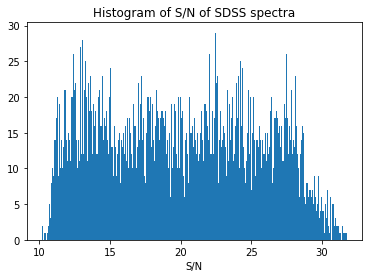

In [13]:
plt.hist(df_s_to_n["s_to_n"], bins=300)
plt.xlabel("S/N")
plt.title("Histogram of S/N of SDSS spectra")
plt.savefig("junk.png",dpi=300)

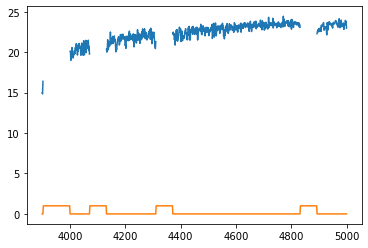

In [10]:
# write out

plt.plot(this_spectrum["wavel"],this_spectrum["s_to_n_spec"])
plt.plot(this_spectrum["wavel"],this_spectrum["line_regions"])
plt.show()

/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: '>=' not supported between instances of 'float' and 'list'

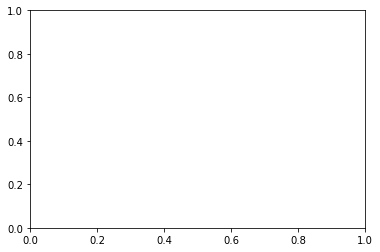

In [17]:
plt.hist(array_net_s_to_n)
plt.show()